# How to Turn your Jupyter Notebook into an Interactive Web Report
### Using Datapane to create engaging data science reports.

## Data Analysis

In [1]:
import datapane as dp
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

px.defaults.width = 800
px.defaults.height = 500

In [2]:
heart_disease = pd.read_csv("heart.csv")
heart_disease.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
heart_disease.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
summary = round(heart_disease.describe(), 1)
summary

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.5,132.4,198.8,0.2,136.8,0.9,0.6
std,9.4,18.5,109.4,0.4,25.5,1.1,0.5
min,28.0,0.0,0.0,0.0,60.0,-2.6,0.0
25%,47.0,120.0,173.2,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
max,77.0,200.0,603.0,1.0,202.0,6.2,1.0


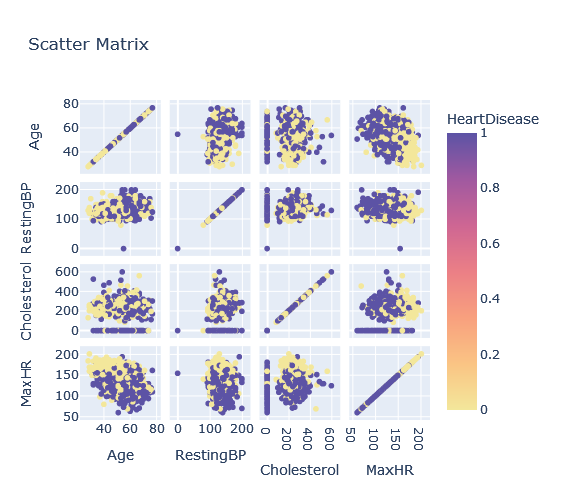

In [6]:
heart_matrix = px.scatter_matrix(
    heart_disease,
    dimensions=['Age', 'RestingBP', 'Cholesterol', 'MaxHR'],
    color='HeartDisease',
    title='Scatter Matrix',
    color_continuous_scale='Sunset'
)

heart_matrix.show()


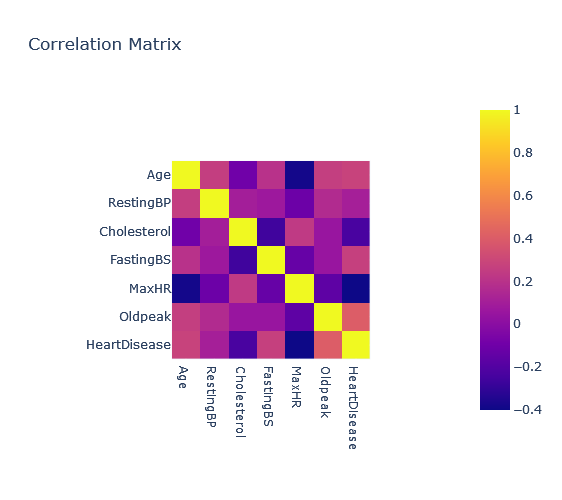

In [7]:
heart_corr = px.imshow(heart_disease.corr(), title='Correlation Matrix')
heart_corr.show()

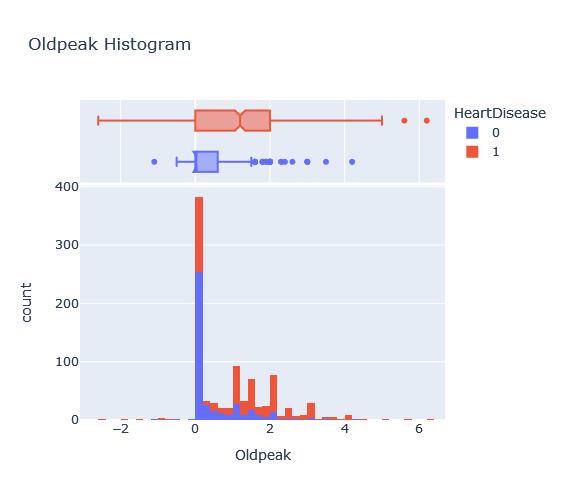

In [8]:
peak_hist = px.histogram(heart_disease, x='Oldpeak',
                         color='HeartDisease', marginal='box', title='Oldpeak Histogram'
                         )
peak_hist.show()

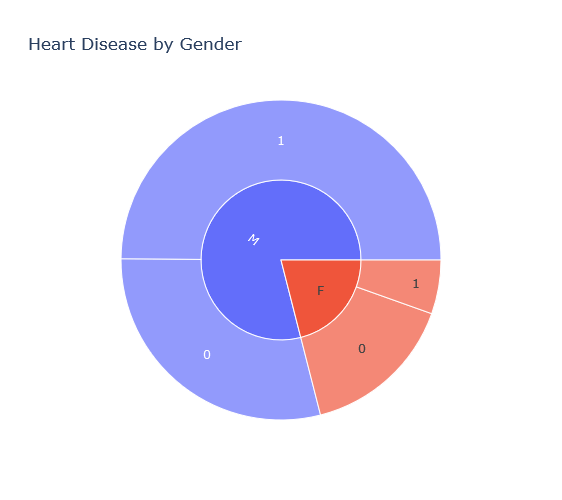

In [9]:
gender_sunburst = px.sunburst(
    heart_disease, path=['Sex', 'HeartDisease'], title="Heart Disease by Gender")
gender_sunburst.show()


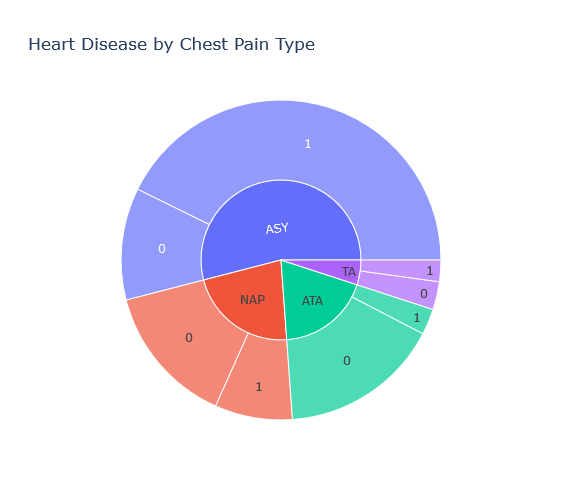

In [10]:
pain_sunburst = px.sunburst(heart_disease, path=[
                            'ChestPainType', 'HeartDisease'], title="Heart Disease by Chest Pain Type")
pain_sunburst.show()


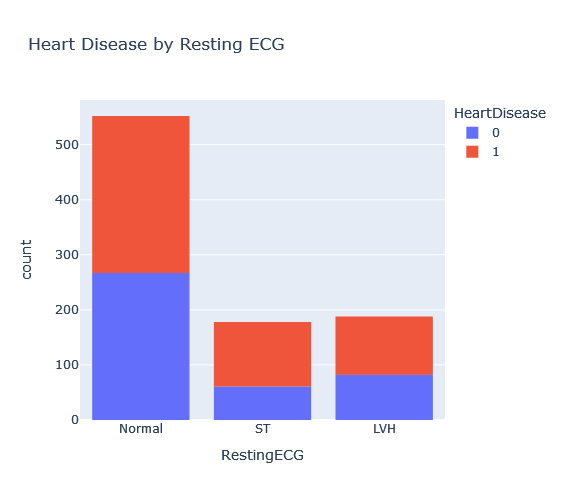

In [11]:
ecg_hist = px.histogram(heart_disease, x='RestingECG',
                        color='HeartDisease', title="Heart Disease by Resting ECG")
ecg_hist.show()


## Classification

In [12]:
one_hot = pd.DataFrame()
for i in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    encoded = pd.get_dummies(heart_disease[i], prefix=i)
    one_hot = pd.concat([one_hot, encoded], axis=1)

one_hot.head(5)


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [13]:
normalized = heart_disease[['Age', 'Cholesterol',
                            'MaxHR', 'Oldpeak']]
scalar = StandardScaler()
normalized = pd.DataFrame(scalar.fit_transform(normalized),
                          columns=['Age', 'Cholesterol',
                                   'MaxHR', 'Oldpeak'])
normalized.head(5)


,Age,Cholesterol,MaxHR,Oldpeak
0,-1.433140,0.825070,1.382928,-0.832432
1,-0.478484,-0.171961,0.754157,0.105664
2,-1.751359,0.770188,-1.525138,-0.832432
3,-0.584556,0.139040,-1.132156,0.574711
4,0.051881,-0.034755,-0.581981,-0.832432


In [14]:
standardized_data = pd.concat(
    [normalized, one_hot, heart_disease[['FastingBS', 'HeartDisease']]], axis=1)
standardized_data.head(10)


,Age,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,HeartDisease
0,-1.433140,0.825070,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,-0.478484,-0.171961,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
2,-1.751359,0.770188,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
3,-0.584556,0.139040,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,0.051881,-0.034755,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
5,-1.539213,1.282424,1.304332,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
6,-0.902775,0.349422,1.304332,-0.832432,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
7,0.051881,0.084157,0.203982,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
8,-1.751359,0.075010,-0.267596,0.574711,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
9,-0.584556,0.779335,-0.660578,-0.832432,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    standardized_data[standardized_data.columns[standardized_data.columns != 'HeartDisease']],
    standardized_data['HeartDisease'], random_state=0)


In [16]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

train_percent = round(gnb.score(X_train, y_train), 2)
test_percent = round(((y_test == y_pred).sum() / len(X_test)), 2)
print('Train Percent correctly classified: ', train_percent)
print('Test Percent correctly classified: ', test_percent)


Train Percent correctly classified:  0.87
Test Percent correctly classified:  0.83


In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = round(tp/(tp+fp), 2)
recall = round(tp/(tp+fn), 2)
print('Test precision: ', precision)
print('Test recall: ', recall)


Test precision:  0.85
Test recall:  0.88


In [18]:
introduction = """
## Introduction

This data analysis project is an example that explores the [heart disease dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction) from Kaggle. This is a part of a blog post I wrote here, which covers some of the main components and features of Datapane. This dataset is comprised of 918 observations which is a combination of five heart disease datasets. The goal of this analysis is to explore some of the features which can help to predict heart disease. According to the CDC heart disease is the leading cause of death in the United States, and data analysis and machine learning can be a tool to catch diseases early, leading to better treatment.

Below are two tabs, one for the full dataset, and the other for the basic summary statistics of the dataset. The data consists of 11 features and one target which is HeartDisease, the variable we want to predict. HeartDisease is binary, a 0 indicates no heart disease, and a 1 indicates heart disease. The link to the dataset describes all the columns if you need to reference that. 

Next, we get some understanding of the data from the summary statistics. The average age of observations is 53.5 years old with a standard deviation of 9.4 years. Additionally, with an average of 0.6 for heart disease the data is fairly well split between those with and without heart disease.  
"""

citation = """
Data Citation:  fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved 2022-12-28 from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Link to repo for this [code.]()
"""

analysis = """
## Data Analysis

Let's explore the data more in-depth now, specifically looking for some relationships between features and heart disease. Below is a scatter matrix that shows the relationship between a few variables and is colored based on heart disease. Right away it appears none of these variables alone can predict the prevalence of heart disease. Max heart rate splits the groups well but there is still a decent amount of overlap.
"""

correlation = """
As is shown from the correlation matrix, max heart rate does seem to have a stronger relationship than most, with a correlation of -0.38. This suggests that those who can achieve a higher max heart rate are less likely to develop heart disease. The next relationship which looks interesting is Oldpeak with a correlation of 0.4. Besides those two, fasting blood sugar and cholesterol have some relationship but less than the previous two mentioned.
"""

histogram = """
Exploring Oldpeak more with a histogram the relationship is better understood. Those who have heart disease also tend to have higher and more variation in the level of Oldpeak, specifically over a value of 1. While an oldpeak of 0 won't rule you out for heart disease, a value greater than or equal to 1 significantly increases your chances. 
"""

three = """
The next three charts show some other relationships in the data. The first shows the relationship between gender and heart disease. It is also important to note that this dataset skews heavily male, where over 3/4 of the dataset is male. This should be noted as for any of this information to be used properly it should either be balanced by gender or viewed separately by gender. In its current state, the data could lead to misdiagnosis if there are significant differences by gender. One difference is that males have a higher rate of heart disease in this dataset, while females have a lower rate.

The next chart shows heart disease by pain type. While all types have some occurrence of heart disease, ATA has the least, and ASY has the most cases of heart disease. Finally, we look at heart disease by resting ECG type. There doesn't appear to be any relationship in this feature as they all appear to be roughly split 50/50 for heart disease. 
"""

classification = """
## Classification

The final part of this exploration is an analysis of classification for the dataset. To classify the data I one-hot encoded the features with categorical data, and I normalized the numerical data. After that, I split the data to train and test datasets and used a naive Bayes classifier(normal distribution) to predict which observations have heart disease. As is shown below the training accuracy was 87%, and the test accuracy was 83%. While these scores seem okay, for any real-world usage the accuracy would need to be significantly higher. This could be accomplished using more data, more features, feature engineering, or different machine learning models.
"""

precision_recall = """
Finally, I think it is always important for classification to look at the precision and recall of a model on test data. The equations for both are shown below. In this scenario, precision is when the model predicts someone has heart disease the model is correct 85% of the time. The recall is the percent of heart disease that is correctly identified, in this case, 88%.
"""


## DataPane

In [19]:
dp.Report(
    dp.Page(
        dp.Text(introduction),
        dp.Select(blocks=[
            dp.DataTable(heart_disease, label='Full Dataset'),
            dp.DataTable(summary, label='Summary Stats'),
        ]
        ),
        dp.Text(citation),
        title='Introduction'
    ),
    dp.Page(
        dp.Text(analysis),
        dp.Plot(heart_matrix),
        dp.Group(
            dp.Text(correlation),
            dp.Plot(heart_corr),
            columns=2
        ),
        dp.Group(
            dp.Plot(peak_hist),
            dp.Text(histogram),
            columns=2
        ),
        dp.Text(three),
        dp.Group(
            dp.Plot(gender_sunburst),
            dp.Plot(pain_sunburst),
            dp.Plot(ecg_hist),
            columns=3
        ),
        title='Data Analysis'
    ),
    dp.Page(
        dp.Text(classification),
        dp.Group(
            dp.BigNumber(
                heading='Training Accuracy',
                value=str(train_percent*100) + '%'
            ),
            dp.BigNumber(
                heading='Test Accuracy',
                value=str(test_percent*100) + '%',
                change=str(train_percent*100 - test_percent*100) + '%',
                is_upward_change=False
            ),
            columns=2
        ),
        dp.Text(precision_recall),
        dp.Group(
            dp.Formula(r"Precision = \frac{TP}{TP+FP}"),
            dp.Formula(r"Recall = \frac{TP}{TP+FN}"),
            columns=2
        ),
        dp.Group(
            dp.BigNumber(
                heading='Precision',
                value=str(precision*100) + '%'
            ),
            dp.BigNumber(
                heading='Recall',
                value=str(recall*100) + '%',
            ),
            columns=2
        ),
        title='Classification'
    )
).upload(name='Heart Disease')


Uploading report and associated data - *please wait...*

Report successfully uploaded, click [here](https://datapane.com/u/hayes/reports/9AxpPYA/heart-disease/) to view and share your report.